In [1]:
%matplotlib widget
import numpy as np
import quaternion as Q
import matplotlib.pyplot as plt

# Orientation Trajectory Generation

Simulate an object undergoing random rotations, and produce a measurement vector consisting of acceleration, and angular velocity data. 

ToDo: Also include a random walk of the particle in translational DoF so that these accelerations can be applied to the accelerometer meaurement.

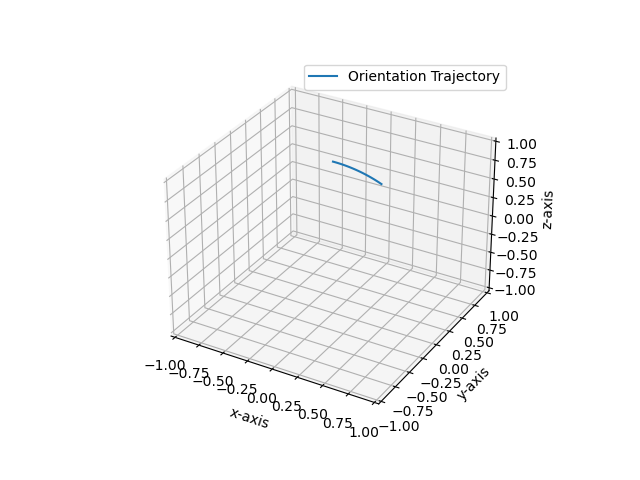

In [31]:
def q_inv(q):
    # quaternion inverse
    conj = np.array(Q.as_float_array(q)) * np.array([1, -1, -1, -1])
    mag2 = np.dot(conj, conj)
    return Q.from_float_array(conj / mag2)

def X_0(q_0=Q.from_euler_angles(0, 0, 0), w_0=np.zeros(3)):
    # initialize state vector
    return q_0, w_0

def X_t_1(X_t, dt, stddev=np.ones(3), bias=np.zeros(3)):
    # Compute the next step of X given some normally distributed
    # random angular acceleration
    q_t, w_t = X_t
    
    # Generate a random angular acceleration in the inertial frame
    w_dot = (stddev ** 2) * np.random.randn(3) + bias
    
    w_t_1 = w_t + w_dot * dt # ang. vel. update from ang. acc.
    q_t_1 = q_t * Q.from_euler_angles(w_t_1 * dt) # orientation update in global frame
    
    return q_t_1, w_t_1

def X_t_1_const(X_t, dt, stddev=np.ones(3), bias=np.zeros(3)):
    # Compute the next step of X given some normally distributed
    # random angular acceleration
    q_t, w_t = X_t
    
    # Generate a random angular acceleration in the inertial frame
    w_dot = np.array([0, 1, 0])
    
    w_t_1 = w_t + w_dot * dt # ang. vel. update from ang. acc.
    q_t_1 = q_t * Q.from_euler_angles(w_t_1 * dt) # orientation update in global frame
    
    return q_t_1, w_t_1

def Z_t(X_t):
    # produce measurements from true state
    acc = Q.rotate_vectors(q_inv(X_t[0]), np.array([0, 0, -1]))
    return acc

samples = []
acc_samples = []
X_t = X_0()
for _ in range(100):
    samples.append(Q.rotate_vectors(X_t[0], np.array([0, 0, 1])))
    acc_samples.append(Z_t(X_t))
    X_t = X_t_1_const(X_t, 0.01, stddev=np.ones(3) * 10)

samples = np.array(samples)
acc_samples = np.array(acc_samples)


ax = plt.figure().add_subplot(projection='3d')
ax.plot(samples[:,0], samples[:,1], samples[:,2], label='Orientation Trajectory')
ax.legend()
plt.xlim([-1, 1])
plt.ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

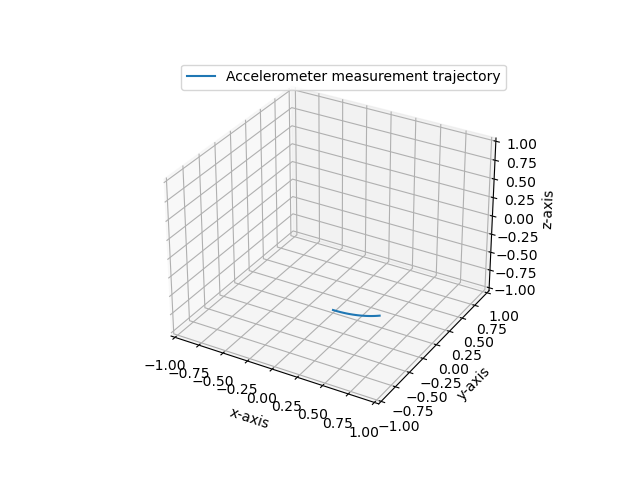

In [32]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(acc_samples[:,0], acc_samples[:,1], acc_samples[:,2], label='Accelerometer measurement trajectory')
ax.legend()
plt.xlim([-1, 1])
plt.ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()